In [215]:
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 
import scipy.stats as stats
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("autumn_r")

Загрузить файл HR.csv в pandas dataframe

In [216]:
HR = pd.read_csv("HR.csv", sep=",")
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [217]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [218]:
HR.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитать и визуализировать корреляционную матрицу для количественных переменных. 
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [219]:
HR_new = HR[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years"]]
HR_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [220]:
HR_new.corr().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


In [260]:
HR_new.corr(method="spearman").round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.16,0.01,0.06,-0.14,0.06,-0.37,0.02
last_evaluation,0.16,1.00,0.35,0.34,0.16,-0.01,-0.00,-0.01
number_project,0.01,0.35,1.00,0.40,0.25,0.00,-0.02,-0.00
average_montly_hours,0.06,0.34,0.40,1.00,0.17,-0.01,0.05,-0.00
time_spend_company,-0.14,0.16,0.25,0.17,1.00,-0.03,0.27,0.04
Work_accident,0.06,-0.01,0.00,-0.01,-0.03,1.00,-0.15,0.04
left,-0.37,-0.00,-0.02,0.05,0.27,-0.15,1.00,-0.06
promotion_last_5years,0.02,-0.01,-0.00,-0.00,0.04,0.04,-0.06,1.00


/var/folders/z6/rrtnvbd11pb79kz4_3r5fr4r0000gn/T/ipykernel_62880/3472814349.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matrix = plt.colorbar()


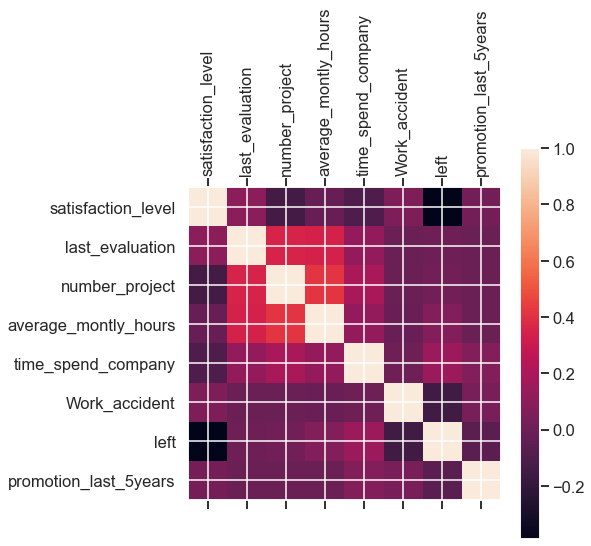

In [367]:
figure = plt.figure(figsize = (7, 7))
plt.matshow(HR_new.corr(), fignum = figure.number)
plt.xticks(range(HR_new.shape[1]), HR_new.columns, rotation = 90)
plt.yticks(range(HR_new.shape[1]), HR_new.columns)
matrix = plt.colorbar()

/var/folders/z6/rrtnvbd11pb79kz4_3r5fr4r0000gn/T/ipykernel_62880/1320261293.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  matrix = plt.colorbar()


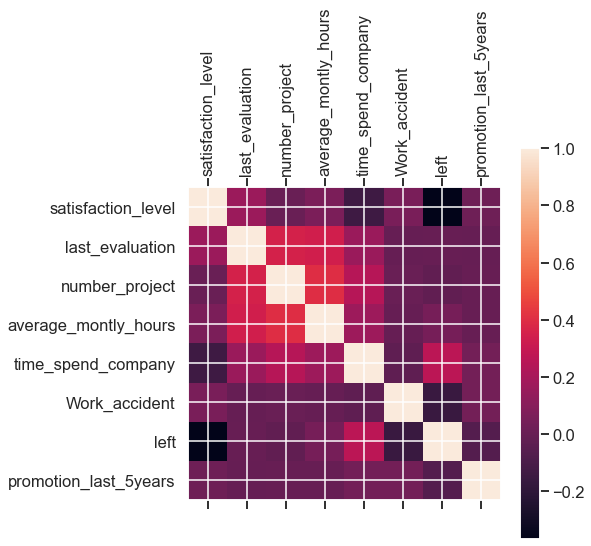

In [368]:
figure = plt.figure(figsize = (7, 7))
plt.matshow(HR_new.corr(method = "spearman"), fignum = figure.number)
plt.xticks(range(HR_new.shape[1]), HR_new.columns, rotation = 90)
plt.yticks(range(HR_new.shape[1]), HR_new.columns)
matrix = plt.colorbar()

Рассчитать сколько сотрудников работает в каждом департаменте.

In [222]:
HR.groupby("department")["department"].size().reset_index(name = "employees")

,department,employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


Показать распределение сотрудников по зарплатам.

<AxesSubplot:xlabel='salary'>

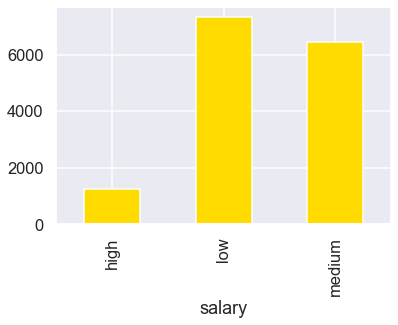

In [223]:
HR.groupby("salary")["salary"].count().plot(kind = "bar")

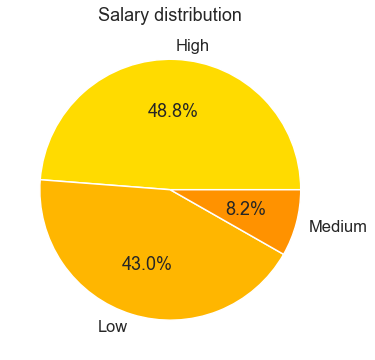

In [224]:
labels = ["High", "Low", "Medium"]
sizes = HR["salary"].value_counts()
plt.figure(figsize = (6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Salary distribution")
plt.show()

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [225]:
salary = HR.groupby([HR["department"],HR["salary"]])[["salary"]].count()
salary

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

Text(0.5, 1.0, 'Salaries per department')

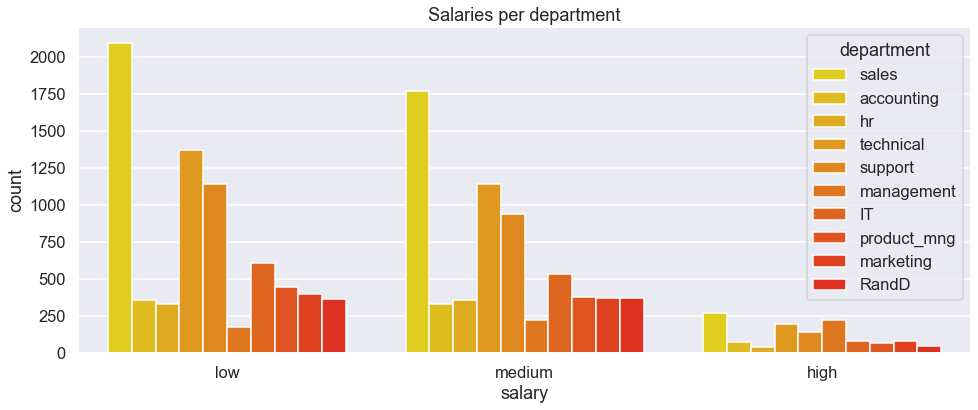

In [226]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = "salary", data = HR, palette = "autumn_r", hue = "department", order = HR["salary"].value_counts().index[0:5])
ax.set_title("Salaries per department")

Отдел продаж - наиболее многочисленный безотносительно привязки к уровню заработной платы.

In [183]:
high_salary = list(HR.loc[HR["salary"] == "high"]["average_montly_hours"])

In [184]:
low_salary = list(HR.loc[HR["salary"] == "low"]["average_montly_hours"])

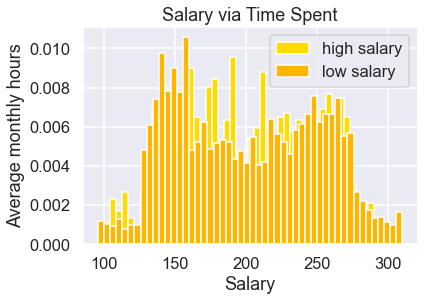

In [342]:
plt.hist(high_salary, bins = 50, density = True);
plt.hist(low_salary, bins = 50, density = True);
plt.title("Salary via Time Spent")
plt.xlabel("Salary")
plt.ylabel("Average monthly hours")
plt.legend(["high salary", "low salary"]) 

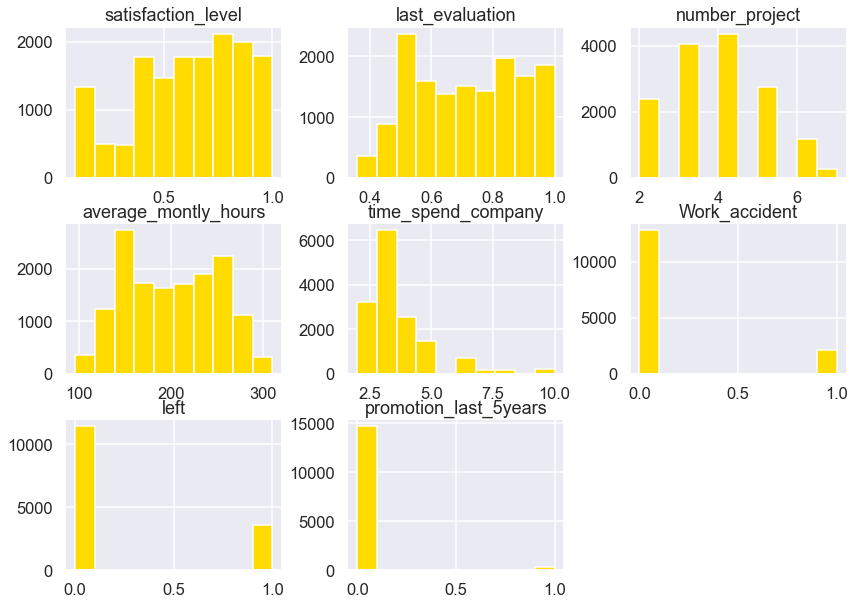

In [314]:
HR.hist(figsize = (14,10)) 
plt.show() 

In [228]:
high, low = stats.ttest_ind(high_salary, low_salary)
print(high, low)

-0.7288680398062308 0.4661023478267259


Рассчитать следующие показатели среди уволившихся сотрудников (по отдельности): 
a) Доля сотрудников с повышением за последние 5 лет; 
b) Средняя степень удовлетворенности; 
c) Среднее количество проектов.

In [303]:
HR["left"].value_counts() 

0    11428
1     3571
Name: left, dtype: int64

Общее количество уволившихся сотрудников: 3571. Сравним средник показатели для обеих категорий сотрудников (уволившихся и оствшихся).

Text(0, 0.5, 'Employees')

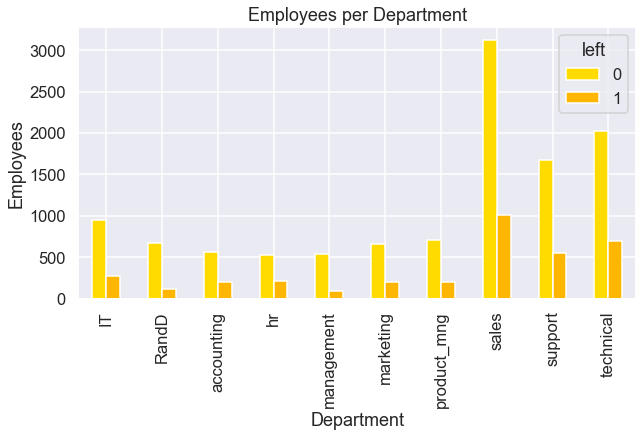

In [373]:
pd.crosstab(HR.department,HR.left).plot(kind = "bar", figsize = (10,5))
plt.title("Employees per Department")
plt.xlabel("Department")
plt.ylabel("Employees")

In [304]:
HR.groupby("left").mean() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Перейдем к отдельным показателям для уволившихся сотрудников:

In [229]:
left = HR.loc[HR["left"] == 1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [230]:
promotion_l = left.loc[left["promotion_last_5years"] == 1]
promotion_l.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
82,0.79,0.59,4,139,3,0,1,1,management,low
171,0.41,0.46,2,160,3,0,1,1,sales,low
287,0.11,0.79,6,292,4,0,1,1,technical,low
584,0.41,0.56,2,154,3,0,1,1,support,medium


In [231]:
# Доля уволившихся сотрудников с повышением за последние 5 лет
len(promotion_l)/len(left)

0.005320638476617194

In [232]:
# Средняя степень удовлетворенности уволившихся сотрудников
left["satisfaction_level"].mean()

0.44009801176140917

In [233]:
# Среднее количество проектов уволившихся сотрудников
left["number_project"].mean()

3.8555026603192384

Рассчитать следующие показатели среди не уволившихся сотрудников (по отдельности): 
a) Доля сотрудников с повышением за последние 5 лет; 
b) Средняя степень удовлетворенности; 
c) Среднее количество проектов.

In [234]:
stayed = HR.loc[HR["left"] == 0]
stayed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [235]:
promotion_s = stayed.loc[stayed["promotion_last_5years"] == 1]
promotion_s.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
4499,0.94,0.80,5,111,4,0,0,1,RandD,medium
4500,0.58,0.71,4,145,3,1,0,1,RandD,medium
4501,0.43,0.60,3,138,3,0,0,1,RandD,medium
4502,0.72,0.49,3,203,3,0,0,1,RandD,medium
4503,0.95,0.96,5,175,3,1,0,1,RandD,medium


In [236]:
# Доля не уволившихся сотрудников с повышением за последние 5 лет
len(promotion_s)/len(stayed)

0.026251312565628283

In [237]:
# Средняя степень удовлетворенности не уволившихся сотрудников
stayed["satisfaction_level"].mean()

0.666809590479516

In [238]:
# Среднее количество проектов не уволившихся сотрудников
stayed["number_project"].mean()

3.786664333216661

Разделить данные на тестовую и обучающую выборки. 
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
Оценить качество модели на тестовой выборки.

In [266]:
from sklearn.model_selection import train_test_split

In [272]:
HR_train = pd.array(HR["left"])
HR_train

<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 14999, dtype: int64

In [284]:
x_train, x_test, y_train, y_test = train_test_split(
    HR[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years"]], 
    HR_train, 
    test_size = 0.20,
    random_state = 0
)

In [298]:
print("x_train is:")
print(x_train)
x_train.size

x_train is:
       satisfaction_level  last_evaluation  number_project  \
12766                0.75             0.81               5   
3536                 0.13             0.91               2   
10295                0.67             0.74               3   
2137                 0.52             0.43               2   
14774                0.10             0.77               7   
...                   ...              ...             ...   
13123                0.52             0.57               3   
3264                 0.59             0.79               4   
9845                 0.69             0.94               5   
10799                0.78             0.59               5   
2732                 0.56             0.68               5   

       average_montly_hours  time_spend_company  Work_accident  \
12766                   227                   5              0   
3536                    149                   5              0   
10295                   226                  

83993

In [296]:
print("x_test is:")
print(x_test)
x_test.size

x_test is:
       satisfaction_level  last_evaluation  number_project  \
1670                 0.44             0.57               2   
13378                0.55             0.96               3   
10233                0.72             0.67               5   
4719                 0.96             0.75               4   
7003                 0.96             0.54               3   
...                   ...              ...             ...   
14035                0.75             0.79               4   
8469                 0.92             0.49               5   
12453                0.37             0.54               2   
9431                 0.52             0.61               4   
4202                 0.13             0.65               4   

       average_montly_hours  time_spend_company  Work_accident  \
1670                    141                   3              0   
13378                   194                   3              0   
10233                   210                   

21000

In [294]:
print("y_train is:")
print(y_train)
y_train.size

y_train is:
<PandasArray>
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
 ...
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length: 11999, dtype: int64


11999

In [297]:
print("y_test is:")
print(y_test)
y_test.size

y_test is:
<PandasArray>
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 ...
 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Length: 3000, dtype: int64


3000

In [364]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LinearDiscriminantAnalysis()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [365]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(x_test))
print("Accuracy " + str(accuracy_score(y_test, lda.predict(x_test))))

Accuracy 0.7596666666666667


In [366]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy " + str(accuracy_score(y_test, y_pred)))

Accuracy 0.8146666666666667
